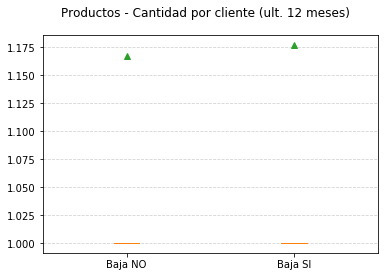

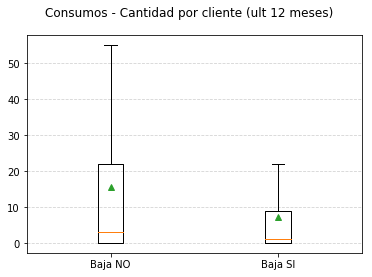

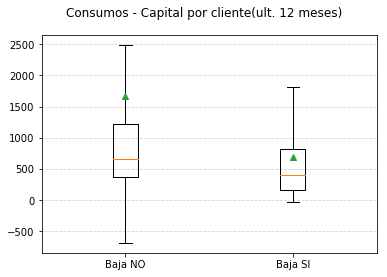

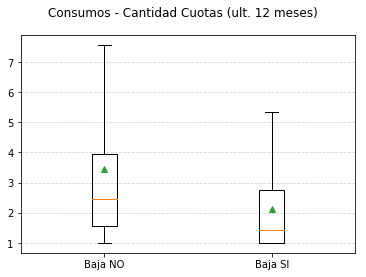

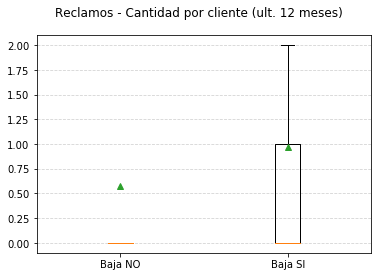

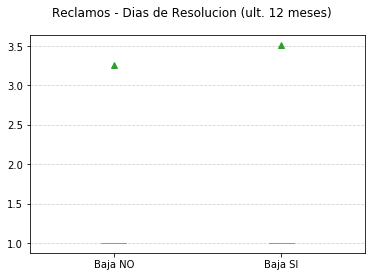

# Nodo,Bajas,Poblacion,% Bajas,% Poblacion,Ganancia*,% Acum Bajas,% Acum Poblacion
16,4,98,0.14,0.02,6.31,0.14,0.02
12,740,20098,26.59,4.67,5.69,26.73,4.70
8,450,16453,16.17,3.83,4.23,42.90,8.52
6,211,15238,7.58,3.54,2.14,50.49,12.07
24,9,681,0.32,0.16,2.04,50.81,12.23
20,201,17357,7.22,4.04,1.79,58.03,16.26
13,22,1919,0.79,0.45,1.77,58.82,16.71
9,76,11028,2.73,2.56,1.06,61.55,19.27
5,716,109673,25.73,25.51,1.01,87.28,44.78
30,44,7884,1.58,1.83,0.86,88.86,46.61


<IPython.core.display.Latex object>

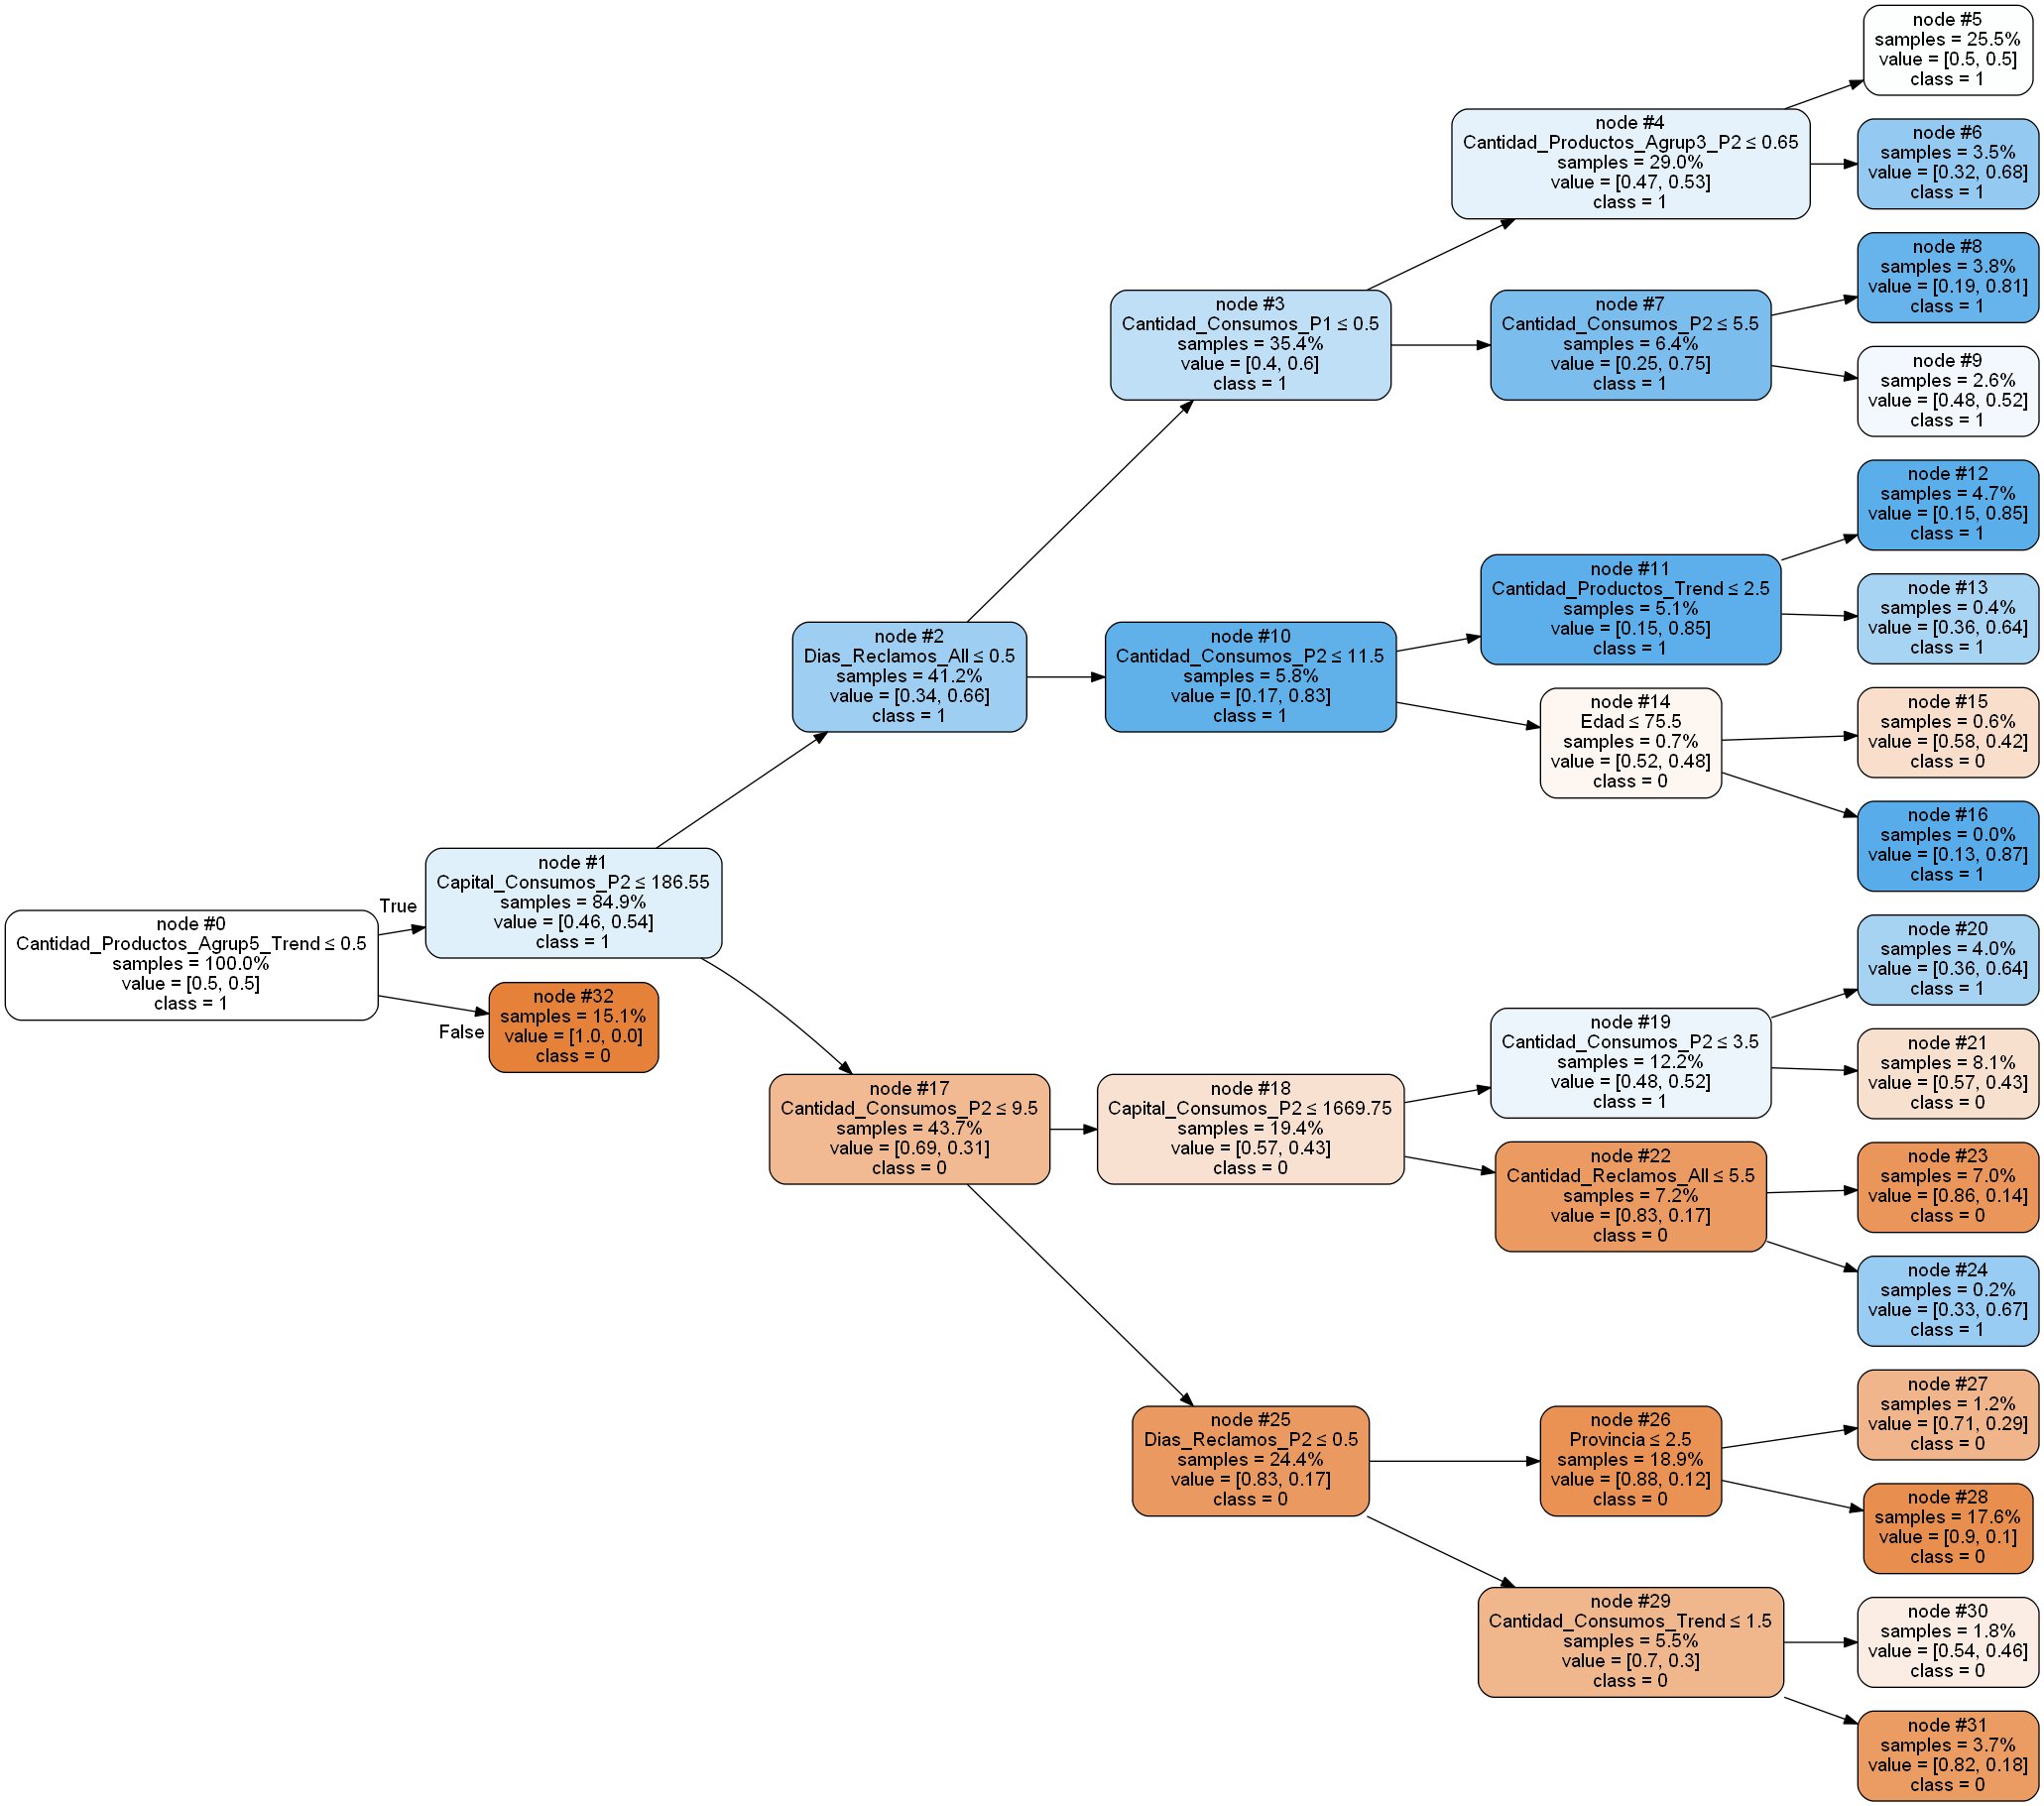

In [4]:
strHTML = "<h2 align='center' style='padding: 2px'>CORDIAL - Modelo de prediccion de bajas</h2>"
strHTML += "<h4 align='center' style='padding: 2px'>Discriminar clientes con mayor propension a darse de baja</h4>"
strHTML += "<h4 align='center' style='padding: 2px'><br>Agosto 2017</h4>"
strHTML += "<h4 align='center' style='padding: 2px'><img src='c:/r/logos.png'>"

strHTML += "<h3 align='left' style='padding: 2px'>:1: Time Frame</h2>"
strHTML += "<p>Utilizamos 15 meses de datos (clientes, productos, consumos y reclamos), desde el 15-FEB-2016 al 15-MAY-2017. <br> Parados sobre el 15-FEB-2017 utilizamos 12 meses de datos para predecir las bajas que ocurriran los proximos 3 meses.</p>"
strHTML += "<img src='c:/r/timeframe.jpg'></p>"
strHTML += "<h3 align='left' style='padding: 2px'>:2: Variables (Predictores)</h2>"
strHTML += "<p>Utilizamos las siguientes variables:</p>"

strHTML += "<table><tr>"
strHTML += "<td width='50%'><p><b>Clientes</b><br><font size=1>Antiguedad<br>Provincia<br> Edad<br>Genero<br>Nacionalidad<br>Ocupacion<br>Estado Civil<br>Cantidad de hijos<br>Nivel Educativo<br>Condicion Propiedad<br><br></font></p></td>"
strHTML += "<td width='50%'><p><b>Productos</b><br><font size=1>Cantidad de productos<br>Cantidad de productos en el periodo 1<br>Cantidad de productos en el periodo 2<br>Tendencia cantidad de productos (sube, igual, baja, n/a)<br>Porcentaje de productos agrupamiento 1<br>Porcentaje de productos agrupamiento 1 en el periodo 1 <br>Procentaje de productos agrupamiento 1 en el periodo 2 <br>Tendendia porcentaje de productos agrupamiento 1 (sube, igual, baja, n/a) <br>... (para los 11 Agrupamientos Empresa-Producto-Entidad)<br><br></font></p></td>"
strHTML += "</tr><tr>"
strHTML += "<td width='50%'><p><b>Consumos</b><br><font size=1>Cantidad de consumos<br>Cantidad de consumos el el periodo 1<br>Cantidad de consumos en el periodo 2<br>Tendencia cantidad de consumos (sube, igual, baja, n/a)<br>Capital promedio (se mutiplico por 16 para la moneda dolar)<br>Capital promedio periodo 1<br>Capital promedio periodo 2<br>Cantidad de cuotas promedio<br>Cantidad de cuotas promedio periodo 1<br>Cantidad de cuotas promedio periodo 2<br>Tendencia cantidad de cuotas promedio (sube, igual, baja, n/a)<br>Tendencia capital promedio (sube, igual, baja, n/a)<br><br><br></font></p></td>" 
strHTML += "<td width='50%'><p><b>Reclamos</b><br><font size=1>Cantidad de reclamos<br>Cantidad de reclamos periodo 1<br>Cantidad de reclamos periodo 2<br>Tendencia cantidad de reclamos (sube, igual, baja, n/a)<br>Cantidad de dias resolucion promedio<br>Cantidad de dias resolucion promedio periodo 1<br>Cantidad de dias resolucion promedio periodo 2<br>Tendencia cantidad de dias resolucion promedio (sube, igual, baja, n/a)<br>Porcentaje cantidad de reclamos estado 1<br>Porcentaje cantidad de reclamos estado 1 periodo 1<br>Porcentaje cantidad de reclamos estado 1 periodo 2<br>Tendencia porcentaje cantidad de reclamos estado 1<br>... (para los 5 Estados)</font></p></td>"
strHTML += "</tr></table>"
strHTML += "<tr><p><font size=1><b>(*)</b> Definimos <b>periodo 1</b> a las fechas entre 15-FEB-2016 hasta el 15-AGO-2016 (primeros 6 meses), y <b>periodo 2</b> a las fechas entre 15-AGO-2016 al 15-FEB-2017 (segundos seis meses). De esta forma definimos <b>tendencia</b> a la variacion entre los dos periodos.</font></p></tr>"

strHTML += "<h3 align='left' style='padding: 2px'>:3: Clase</h2>"
strHTML += "<p>La variable a predecir es Baja SI (1) o Baja NO (0), siempre tomando como BAJA las bajas realizadas por decision del cliente. La clase esta sumamente desbalanceada, ya que tenemos <b>474685 Bajas NO</b> y solamente <b>3093 Bajas SI</b>.</p>"
strHTML += "<table><tr><td align='left'><b>Clase</b></td><td><b>Cantidad</b></td><td><b>Porcentaje</b></td></tr>"
strHTML += "<tr><td align='left'>Baja SI</td><td>3093</td><td>0,6473</td></tr>"
strHTML += "<tr><td align='left'>Baja NO</td><td>474685</td><td>99,3527</td></tr></table>"

strHTML += "<h3 align='left' style='padding: 2px'>:4: Analisis exploratorio</h2>"
strHTML += "<p>Realizamos un primer analisis exploratorio de las distribuciones de las variables principales con respecto a la clase.</p>"

import pandas as pd

from IPython.core.display import display, HTML

display(HTML(strHTML))

import matplotlib.pyplot as plt
import numpy as np

# Leo files
productos = pd.read_csv('c:/r/productos0.txt', sep=",", header = None)
productos2 = pd.read_csv('c:/r/productos1.txt', sep=",", header = None)
productos = [productos, productos2]

consumos = pd.read_csv('c:/r/consumos0.txt', sep=",", header = None)
consumos2 = pd.read_csv('c:/r/consumos1.txt', sep=",", header = None)
consumos = [consumos, consumos2]

cap = pd.read_csv('c:/r/capital0.txt', sep=",", header = None)
cap2 = pd.read_csv('c:/r/capital1.txt', sep=",", header = None)
cap = [cap, cap2]

cuotas = pd.read_csv('c:/r/cuotas0.txt', sep=",", header = None)
cuotas2 = pd.read_csv('c:/r/cuotas1.txt', sep=",", header = None)
cuotas = [cuotas, cuotas2]

reclamos = pd.read_csv('c:/r/reclamos0.txt', sep=",", header = None)
reclamos2 = pd.read_csv('c:/r/reclamos1.txt', sep=",", header = None)
reclamos = [reclamos, reclamos2]

dias = pd.read_csv('c:/r/dias0.txt', sep=",", header = None)
dias2 = pd.read_csv('c:/r/dias1.txt', sep=",", header = None)
dias = [dias, dias2]

# Productos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
fig.suptitle('Productos - Cantidad por cliente (ult. 12 meses)', fontsize=12)
plt.boxplot(productos, showfliers=False, showmeans=True)
plt.xticks([1, 2], ['Baja NO', 'Baja SI'])
plt.show()

strHTML = "<p><font size=1>No se observan diferencias en la distribución de cantidad de productos entre Baja SI y Baja NO.</font><br><br></p>"
display(HTML(strHTML))

# Consumos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
fig.suptitle('Consumos - Cantidad por cliente (ult 12 meses)', fontsize=12)
plt.boxplot(consumos, showfliers=False, showmeans=True)
plt.xticks([1, 2], ['Baja NO', 'Baja SI'])
plt.show()

strHTML = "<p><font size=1>Vemos una distribución que muestra claramente más consumos para los que no se dan de baja. Si bien para los que se dan de baja el 50% de las cantidades de consumo entan entre 0 y 10, para los que no se dan de baja están entre 0 y 20. También se ve que la cantidad de consumos promedio de los que no se dan de baja es practicamente el doble de los que se dan de baja.<br><br>"
display(HTML(strHTML))

# Capital
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
fig.suptitle('Consumos - Capital por cliente(ult. 12 meses)', fontsize=12)
plt.boxplot(cap,showfliers=False, showmeans=True)
plt.xticks([1, 2], ['Baja NO', 'Baja SI'])
plt.show()

strHTML = "<p><font size=1>Se ve un promedio de capital consumido bastante mayor para los que no se dan de baja.<br><br>"
display(HTML(strHTML))


# Cuotas
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
fig.suptitle('Consumos - Cantidad Cuotas (ult. 12 meses)', fontsize=12)
plt.boxplot(cuotas,showfliers=False, showmeans=True)
plt.xticks([1, 2], ['Baja NO', 'Baja SI'])
plt.show()

strHTML = "<p><font size=1>Si bien el 75% de los que se dan de baja utilizan entre 1 y 3 cuotas, los que no se dan de baja utilizan entre 1 y 4 cuotas.<br><br>"
display(HTML(strHTML))

# Reclamos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
fig.suptitle('Reclamos - Cantidad por cliente (ult. 12 meses)', fontsize=12)
plt.boxplot(reclamos,showfliers=False, showmeans=True)
plt.xticks([1, 2], ['Baja NO', 'Baja SI'])
plt.show()

strHTML = "<p><font size=1>Se ve mayor cantidad de reclamos por parte de los que se dan de baja, con una media de practicamente el doble respecto a los que no se dan de baja. Uno de cada cuatro de los que se dan de baja hicieron 1 o 2 reclamos en los últimos 12 meses.<br><br>"
display(HTML(strHTML))


# Dias
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
fig.suptitle('Reclamos - Dias de Resolucion (ult. 12 meses)', fontsize=12)
plt.boxplot(dias,showfliers=False, showmeans=True)
plt.xticks([1, 2], ['Baja NO', 'Baja SI'])
plt.show()

strHTML = "<p><font size=1>Se ve una pequeña difierencia entre la cantidad de días de resolución a los reclamos realizados por los que no se dan de baja respecto a los que si se dan.<br><br>"
display(HTML(strHTML))


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import StringIO
import pydotplus
from IPython.display import Image
from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from IPython.core.display import display, HTML



# Tree
#strHTML = "<h2 style='padding: 10px'>Modelo</h2>"
#display(HTML(strHTML))

strHTML += "<p>La variable a predecir es Baja SI (1) o Baja NO (0), siempre tomando como BAJA las bajas realizadas por decision del cliente. La clase esta sumamente desbalanceada, ya que tenemos <b>474685 Bajas NO</b> y solamente <b>3093 Bajas SI</b>.</p>"
strHTML += "<table><tr><td align='left'><b>Clase</b></td><td><b>Cantidad</b></td><td><b>Porcentaje</b></td></tr>"
strHTML += "<tr><td align='left'>Baja SI</td><td>3093</td><td>0,6473</td></tr>"
strHTML += "<tr><td align='left'>Baja NO</td><td>474685</td><td>99,3527</td></tr></table>"

# Leo file
data = pd.read_csv('c:/r/mydata3.txt', sep=",", header = None)

# Etiqueto variables
data.columns = ["Id", "Antig", "Provincia", "Edad", "Genero", "Nacionalidad", "Ocupacion", "EstadoCivil", "CantHijos", "NivelEstudio", "CondProp", "Clase","Cantidad_Productos_All","Cantidad_Productos_P1","Cantidad_Productos_P2","Cantidad_Productos_Trend","Cantidad_Productos_Agrup1_All","Cantidad_Productos_Agrup1_P1","Cantidad_Productos_Agrup1_P2","Cantidad_Productos_Agrup1_Trend","Cantidad_Productos_Agrup2_All","Cantidad_Productos_Agrup2_P1","Cantidad_Productos_Agrup2_P2","Cantidad_Productos_Agrup2_Trend","Cantidad_Productos_Agrup3_All","Cantidad_Productos_Agrup3_P1","Cantidad_Productos_Agrup3_P2","Cantidad_Productos_Agrup3_Trend","Cantidad_Productos_Agrup4_All","Cantidad_Productos_Agrup4_P1","Cantidad_Productos_Agrup4_P2","Cantidad_Productos_Agrup4_Trend","Cantidad_Productos_Agrup5_All","Cantidad_Productos_Agrup5_P1","Cantidad_Productos_Agrup5_P2","Cantidad_Productos_Agrup5_Trend","Cantidad_Productos_Agrup6_All","Cantidad_Productos_Agrup6_P1","Cantidad_Productos_Agrup6_P2","Cantidad_Productos_Agrup6_Trend","Cantidad_Productos_Agrup7_All","Cantidad_Productos_Agrup7_P1","Cantidad_Productos_Agrup7_P2","Cantidad_Productos_Agrup7_Trend","Cantidad_Productos_Agrup8_All","Cantidad_Productos_Agrup8_P1","Cantidad_Productos_Agrup8_P2","Cantidad_Productos_Agrup8_Trend","Cantidad_Productos_Agrup9_All","Cantidad_Productos_Agrup9_P1","Cantidad_Productos_Agrup9_P2","Cantidad_Productos_Agrup9_Trend","Cantidad_Productos_Agrup10_All","Cantidad_Productos_Agrup10_P1","Cantidad_Productos_Agrup10_P2","Cantidad_Productos_Agrup10_Trend","Cantidad_Productos_Agrup11_All","Cantidad_Productos_Agrup11_P1","Cantidad_Productos_Agrup11_P2","Cantidad_Productos_Agrup11_Trend","Cantidad_Consumos_All","Cantidad_Consumos_P1","Cantidad_Consumos_P2","Cantidad_Consumos_Trend","Capital_Consumos_All","Capital_Consumos_P1","Capital_Consumos_P2","Capital_Consumos_Trend","Cantidad_Reclamos_All","Cantidad_Reclamos_P1","Cantidad_Reclamos_P2","Cantidad_Reclamos_Trend","Dias_Reclamos_All","Dias_Reclamos_P1","Dias_Reclamos_P2","Dias_Reclamos_Tren","Cantidad_Reclamos_Estado1_All","Cantidad_Reclamos_Estado1_P1","Cantidad_Reclamos_Estado1_P2","Cantidad_Reclamos_Estado1_Trend","Cantidad_Reclamos_Estado2_All","Cantidad_Reclamos_Estado2_P1","Cantidad_Reclamos_Estado2_P2","Cantidad_Reclamos_Estado2_Trend","Cantidad_Reclamos_Estado3_All","Cantidad_Reclamos_Estado3_P1","Cantidad_Reclamos_Estado3_P2","Cantidad_Reclamos_Estado3_Trend","Cantidad_Reclamos_Estado4_All","Cantidad_Reclamos_Estado4_P1","Cantidad_Reclamos_Estado4_P2","Cantidad_Reclamos_Estado4_Trend","Cantidad_Reclamos_Estado5_All","Cantidad_Reclamos_Estado5_P1","Cantidad_Reclamos_Estado5_P2","Cantidad_Reclamos_Estado5_Tren"]

# Predictors
X = data[['Antig', 'Provincia', 'Edad', 'Genero', 'Nacionalidad', 'Ocupacion', 'EstadoCivil', 'CantHijos', 'NivelEstudio', 'CondProp','Cantidad_Productos_All','Cantidad_Productos_P1','Cantidad_Productos_P2','Cantidad_Productos_Trend','Cantidad_Productos_Agrup1_All','Cantidad_Productos_Agrup1_P1','Cantidad_Productos_Agrup1_P2','Cantidad_Productos_Agrup1_Trend','Cantidad_Productos_Agrup2_All','Cantidad_Productos_Agrup2_P1','Cantidad_Productos_Agrup2_P2','Cantidad_Productos_Agrup2_Trend','Cantidad_Productos_Agrup3_All','Cantidad_Productos_Agrup3_P1','Cantidad_Productos_Agrup3_P2','Cantidad_Productos_Agrup3_Trend','Cantidad_Productos_Agrup4_All','Cantidad_Productos_Agrup4_P1','Cantidad_Productos_Agrup4_P2','Cantidad_Productos_Agrup4_Trend','Cantidad_Productos_Agrup5_All','Cantidad_Productos_Agrup5_P1','Cantidad_Productos_Agrup5_P2','Cantidad_Productos_Agrup5_Trend','Cantidad_Productos_Agrup6_All','Cantidad_Productos_Agrup6_P1','Cantidad_Productos_Agrup6_P2','Cantidad_Productos_Agrup6_Trend','Cantidad_Productos_Agrup7_All','Cantidad_Productos_Agrup7_P1','Cantidad_Productos_Agrup7_P2','Cantidad_Productos_Agrup7_Trend','Cantidad_Productos_Agrup8_All','Cantidad_Productos_Agrup8_P1','Cantidad_Productos_Agrup8_P2','Cantidad_Productos_Agrup8_Trend','Cantidad_Productos_Agrup9_All','Cantidad_Productos_Agrup9_P1','Cantidad_Productos_Agrup9_P2','Cantidad_Productos_Agrup9_Trend','Cantidad_Productos_Agrup10_All','Cantidad_Productos_Agrup10_P1','Cantidad_Productos_Agrup10_P2','Cantidad_Productos_Agrup10_Trend','Cantidad_Productos_Agrup11_All','Cantidad_Productos_Agrup11_P1','Cantidad_Productos_Agrup11_P2','Cantidad_Productos_Agrup11_Trend','Cantidad_Consumos_All','Cantidad_Consumos_P1','Cantidad_Consumos_P2','Cantidad_Consumos_Trend','Capital_Consumos_All','Capital_Consumos_P1','Capital_Consumos_P2','Capital_Consumos_Trend','Cantidad_Reclamos_All','Cantidad_Reclamos_P1','Cantidad_Reclamos_P2','Cantidad_Reclamos_Trend','Dias_Reclamos_All','Dias_Reclamos_P1','Dias_Reclamos_P2','Dias_Reclamos_Tren','Cantidad_Reclamos_Estado1_All','Cantidad_Reclamos_Estado1_P1','Cantidad_Reclamos_Estado1_P2','Cantidad_Reclamos_Estado1_Trend','Cantidad_Reclamos_Estado2_All','Cantidad_Reclamos_Estado2_P1','Cantidad_Reclamos_Estado2_P2','Cantidad_Reclamos_Estado2_Trend','Cantidad_Reclamos_Estado3_All','Cantidad_Reclamos_Estado3_P1','Cantidad_Reclamos_Estado3_P2','Cantidad_Reclamos_Estado3_Trend','Cantidad_Reclamos_Estado4_All','Cantidad_Reclamos_Estado4_P1','Cantidad_Reclamos_Estado4_P2','Cantidad_Reclamos_Estado4_Trend','Cantidad_Reclamos_Estado5_All','Cantidad_Reclamos_Estado5_P1','Cantidad_Reclamos_Estado5_P2','Cantidad_Reclamos_Estado5_Tren']]

# Class
y = data[['Clase']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10,random_state=0)

# Model
clf2 = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=50,min_samples_split=20,class_weight='balanced')

# Fit
clf2 = clf2.fit(X_train, y_train)

# Predict
clf3 = clf2.predict_proba(X_test)


#strHTML = "<h2 style='padding: 10px'>Tablita de Ganacia</h2>"
strHTML = "<h3 align='left' style='padding: 2px'>:5: Modelo</h2>"

strHTML +="<table class='table table-striped'>"
strHTML +="<thead> <tr> <th># Nodo</th> <th>Bajas</th> <th>Poblacion</th> <th>% Bajas</th> <th>% Poblacion</th><th>Ganancia*</th><th>% Acum Bajas</th><th>% Acum Poblacion</th> </tr> </thead>"
strHTML +="<tbody>"
strHTML +="<tr> <th scope='row'>16</font></th><td>4</td><td>98</td><td>0.14</td><td>0.02</td><td>6.31</td><td>0.14</td><td>0.02</td></tr>"
strHTML +="<tr> <th scope='row'><font color=blue>12</font></th><td><font color=blue>740</font></td><td><font color=blue>20098</font></td><td><font color=blue>26.59</font></td><td><font color=blue>4.67</font></td><td><font color=blue>5.69</font></td><td><font color=blue>26.73</font></td><td><font color=blue>4.70</font></td></tr>"
strHTML +="<tr> <th scope='row'><font color=blue>8</font></th><td><font color=blue>450</font></td><td><font color=blue>16453</font></td><td><font color=blue>16.17</font></td><td><font color=blue>3.83</font></td><td><font color=blue>4.23</font></td><td><font color=blue>42.90</font></td><td><font color=blue>8.52</font></td></tr>"
strHTML +="<tr> <th scope='row'>6</th><td>211</td><td>15238</td><td>7.58</td><td>3.54	</td><td>2.14	</td><td>50.49	</td><td>12.07</td></tr>"
strHTML +="<tr> <th scope='row'>24</th><td>9</td><td>681</td><td>0.32</td><td>0.16	</td><td>2.04	</td><td>50.81	</td><td>12.23</td></tr>"
strHTML +="<tr> <th scope='row'>20</th><td>201</td><td>17357</td><td>7.22</td><td>4.04	</td><td>1.79	</td><td>58.03	</td><td>16.26</td></tr>"
strHTML +="<tr> <th scope='row'>13</th><td>22</td><td>1919</td><td>0.79</td><td>0.45	</td><td>1.77	</td><td>58.82	</td><td>16.71</td></tr>"
strHTML +="<tr> <th scope='row'>9</th><td>76</td><td>11028</td><td>2.73</td><td>2.56	</td><td>1.06	</td><td>61.55	</td><td>19.27</td></tr>"
strHTML +="<tr> <th scope='row'>5</th><td>716</td><td>109673</td><td>25.73</td><td>25.51</td><td>1.01	</td><td>87.28	</td><td>44.78</td></tr>"
strHTML +="<tr> <th scope='row'>30</th><td>44</td><td>7884</td><td>1.58</td><td>1.83	</td><td>0.86	</td><td>88.86	</td><td>46.61</td></tr>"
strHTML +="<tr> <th scope='row'>21</th><td>172</td><td>34945</td><td>6.18</td><td>8.13	</td><td>0.76	</td><td>95.04	</td><td>54.74</td></tr>"
strHTML +="<tr> <th scope='row'>15</th><td>13</td><td>2727</td><td>0.47</td><td>0.63	</td><td>0.74	</td><td>95.51	</td><td>55.37</td></tr>"
strHTML +="<tr> <th scope='row'>27</th><td>14</td><td>5244</td><td>0.50</td><td>1.22	</td><td>0.41	</td><td>96.01	</td><td>56.59</td></tr>"
strHTML +="<tr> <th scope='row'>31</th><td>22</td><td>15806</td><td>0.79</td><td>3.68	</td><td>0.22	</td><td>96.80	</td><td>60.27</td></tr>"
strHTML +="<tr> <th scope='row'>23</th><td>33</td><td>30268</td><td>1.19</td><td>7.04	</td><td>0.17	</td><td>97.99	</td><td>67.31</td></tr>"
strHTML +="<tr> <th scope='row'><font color=blue>28</font></th><td><font color=blue>56</font></td><td><font color=blue>75835</font></td><td><font color=blue>2.01</font></td><td><font color=blue>17.64</font></td><td><font color=blue>0.11</font></td><td><font color=blue>100.00</font></td><td><font color=blue>84.94</font></td></tr>"
strHTML +="<tr> <th scope='row'><font color=blue>32</font></th><td><font color=blue>0</font></td><td><font color=blue>64746</font></td><td><font color=blue>0.00</font></td><td><font color=blue>15.06</font></td><td><font color=blue>0.00</font></td><td><font color=blue>100.00</font></td><td><font color=blue>100.00</font></td></tr>"
strHTML +="</tbody> </table>"
display(HTML(strHTML))

from IPython.display import display, Math, Latex
display(Latex(r"""\begin{eqnarray}
Ganancia^* = \frac{(\frac{Bajas}{Poblacion})}{(\frac{Total Bajas}{Total Poblacion})}\,
\end{eqnarray}"""))

# Calculate fpr, tpr
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values, clf3[:,1])

### GAIN
gain_x = [0,0.02,4.7,8.52,12.07,12.23,16.26,16.71,19.27,44.78,46.61,54.74,55.37,56.59,60.27,67.31,84.94,100]
gain_y = [0,0.14,26.73,42.9,50.49,50.81,58.03,58.82,61.55,87.28,88.86,95.04,95.51,96.01,96.8,97.99,100,100]

roc_auc = auc(gain_x, gain_y) / 10000
roc_auc2 = auc(false_positive_rate, true_positive_rate)

strHTML = "<p>El modelo (arbol) agrupa en distintos nodos los clientes discriminando lo más posible los que se dan de baja de los que no. La tabla muestra los nodos ordenados segun el indice de ganancia (cuanto más lejos de 1 mejor).</p>"
strHTML += "<p><font color=blue>Reglas principales</font></p>"
strHTML += "<p><font size=1><b>Nodo #12</b><br> ::Cantidades<br>4,67% de todos los casos<br>26,59% de todas las bajas<br>Ganancia: 5,69<br>::Regla <br>Cantidad_Productos_Agrup5_Trend <= 0,5 AND Capital_Consumos_P2 <= 186,55 AND Dias_Reclamos_Trend > 0,5 AND Cantidad_Consumos_P2 <= 11,5 AND Cantidad_Productos_Trend <= 2,5 <br><br>Si no tiene productos de refinanciación en los úlitmos doce meses Y Realizó consumos por menos de AR$ 186,55 en menos de 12 veces en los últimos seis meses Y Realizó al menos un reclamo en los últimos doce meses Y Mantuvo o disminuyó la cantidad de productos en los últimos 12 meses </font></p>"

display(HTML(strHTML))

dot_data = StringIO.StringIO()  
tree.export_graphviz(clf2, out_file=dot_data,  
                     feature_names=['Antig', 'Provincia', 'Edad', 'Genero', 'Nacionalidad', 'Ocupacion', 'EstadoCivil', 'CantHijos', 'NivelEstudio', 'CondProp','Cantidad_Productos_All','Cantidad_Productos_P1','Cantidad_Productos_P2','Cantidad_Productos_Trend','Cantidad_Productos_Agrup1_All','Cantidad_Productos_Agrup1_P1','Cantidad_Productos_Agrup1_P2','Cantidad_Productos_Agrup1_Trend','Cantidad_Productos_Agrup2_All','Cantidad_Productos_Agrup2_P1','Cantidad_Productos_Agrup2_P2','Cantidad_Productos_Agrup2_Trend','Cantidad_Productos_Agrup3_All','Cantidad_Productos_Agrup3_P1','Cantidad_Productos_Agrup3_P2','Cantidad_Productos_Agrup3_Trend','Cantidad_Productos_Agrup4_All','Cantidad_Productos_Agrup4_P1','Cantidad_Productos_Agrup4_P2','Cantidad_Productos_Agrup4_Trend','Cantidad_Productos_Agrup5_All','Cantidad_Productos_Agrup5_P1','Cantidad_Productos_Agrup5_P2','Cantidad_Productos_Agrup5_Trend','Cantidad_Productos_Agrup6_All','Cantidad_Productos_Agrup6_P1','Cantidad_Productos_Agrup6_P2','Cantidad_Productos_Agrup6_Trend','Cantidad_Productos_Agrup7_All','Cantidad_Productos_Agrup7_P1','Cantidad_Productos_Agrup7_P2','Cantidad_Productos_Agrup7_Trend','Cantidad_Productos_Agrup8_All','Cantidad_Productos_Agrup8_P1','Cantidad_Productos_Agrup8_P2','Cantidad_Productos_Agrup8_Trend','Cantidad_Productos_Agrup9_All','Cantidad_Productos_Agrup9_P1','Cantidad_Productos_Agrup9_P2','Cantidad_Productos_Agrup9_Trend','Cantidad_Productos_Agrup10_All','Cantidad_Productos_Agrup10_P1','Cantidad_Productos_Agrup10_P2','Cantidad_Productos_Agrup10_Trend','Cantidad_Productos_Agrup11_All','Cantidad_Productos_Agrup11_P1','Cantidad_Productos_Agrup11_P2','Cantidad_Productos_Agrup11_Trend','Cantidad_Consumos_All','Cantidad_Consumos_P1','Cantidad_Consumos_P2','Cantidad_Consumos_Trend','Capital_Consumos_All','Capital_Consumos_P1','Capital_Consumos_P2','Capital_Consumos_Trend','Cantidad_Reclamos_All','Cantidad_Reclamos_P1','Cantidad_Reclamos_P2','Cantidad_Reclamos_Trend','Dias_Reclamos_All','Dias_Reclamos_P1','Dias_Reclamos_P2','Dias_Reclamos_Trend','Cantidad_Reclamos_Estado1_All','Cantidad_Reclamos_Estado1_P1','Cantidad_Reclamos_Estado1_P2','Cantidad_Reclamos_Estado1_Trend','Cantidad_Reclamos_Estado2_All','Cantidad_Reclamos_Estado2_P1','Cantidad_Reclamos_Estado2_P2','Cantidad_Reclamos_Estado2_Trend','Cantidad_Reclamos_Estado3_All','Cantidad_Reclamos_Estado3_P1','Cantidad_Reclamos_Estado3_P2','Cantidad_Reclamos_Estado3_Trend','Cantidad_Reclamos_Estado4_All','Cantidad_Reclamos_Estado4_P1','Cantidad_Reclamos_Estado4_P2','Cantidad_Reclamos_Estado4_Trend','Cantidad_Reclamos_Estado5_All','Cantidad_Reclamos_Estado5_P1','Cantidad_Reclamos_Estado5_P2','Cantidad_Reclamos_Estado5_Trend'],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,
                     special_characters=True,
                    proportion=True,
                    rotate=True,
                    impurity=False,
                    node_ids=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



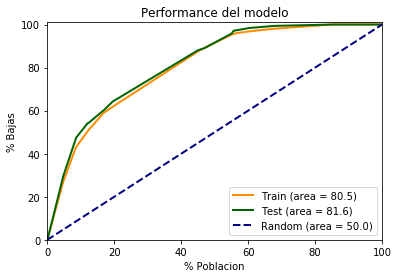

In [5]:
# ROC
strHTML = "<h3 align='left' style='padding: 2px'>:6: Performance</h2>"
strHTML += "<p>Se utilizo el 90 por ciento de los datos para generar el modeo y el 10 por ciento para testearlo.</p>"
strHTML += "<p>En el grafico se puede ver que la performance del model (tanto para el entrenamiento como para el testeo) es muy buena.</p>"
display(HTML(strHTML))

plt.figure()
lw = 2
#plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(gain_x, gain_y, color='darkorange',
         lw=lw, label='Train (area = %0.1f)' % (roc_auc * 100))
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])

plt.plot(false_positive_rate*100, true_positive_rate*100, color='darkgreen',
         lw=lw, label='Test (area = %0.1f)' % (roc_auc2 * 100))

plt.plot([0, 100], [0, 100], color='navy', lw=lw, linestyle='--', label = 'Random (area = %0.1f)' % 50)
plt.xlim([0.0, 100.0])
plt.ylim([0.0, 101.0])

plt.xlabel('% Poblacion')
plt.ylabel('% Bajas')
plt.title('Performance del modelo')
plt.legend(loc="lower right")
plt.show()


strHTML = "<h3 align='left' style='padding: 2px'>:7: Conclusión</h2>"
strHTML += "<p>Se logro realizar un modelo de prediccion de bajas con resultados satisfactiorios.</p>"
strHTML += "<p>Se logra, por ejemplo, detectar mas del 50% de los clientes que se dan de baja, seleccionando poco mas del 10% del total.</p>"


display(HTML(strHTML))



# Nodo,Bajas,Poblacion,% Bajas,% Poblacion,Ganancia*,% Acum Bajas,% Acum Poblacion
20,720,12388,25.88,3.30,7.84,25.88,3.30
12,426,14291,15.31,3.81,4.02,41.19,7.11
8,304,15647,10.93,4.17,2.62,52.12,11.28
50,3,159,0.11,0.04,2.54,52.23,11.32
21,58,3380,2.08,0.90,2.31,54.31,12.22
16,17,1075,0.61,0.29,2.13,54.92,12.51
34,170,10939,6.11,2.92,2.10,61.04,15.43
5,186,13833,6.69,3.69,1.81,67.72,19.11
27,44,3278,1.58,0.87,1.81,69.30,19.99
38,28,2351,1.01,0.63,1.61,70.31,20.61


<IPython.core.display.Latex object>

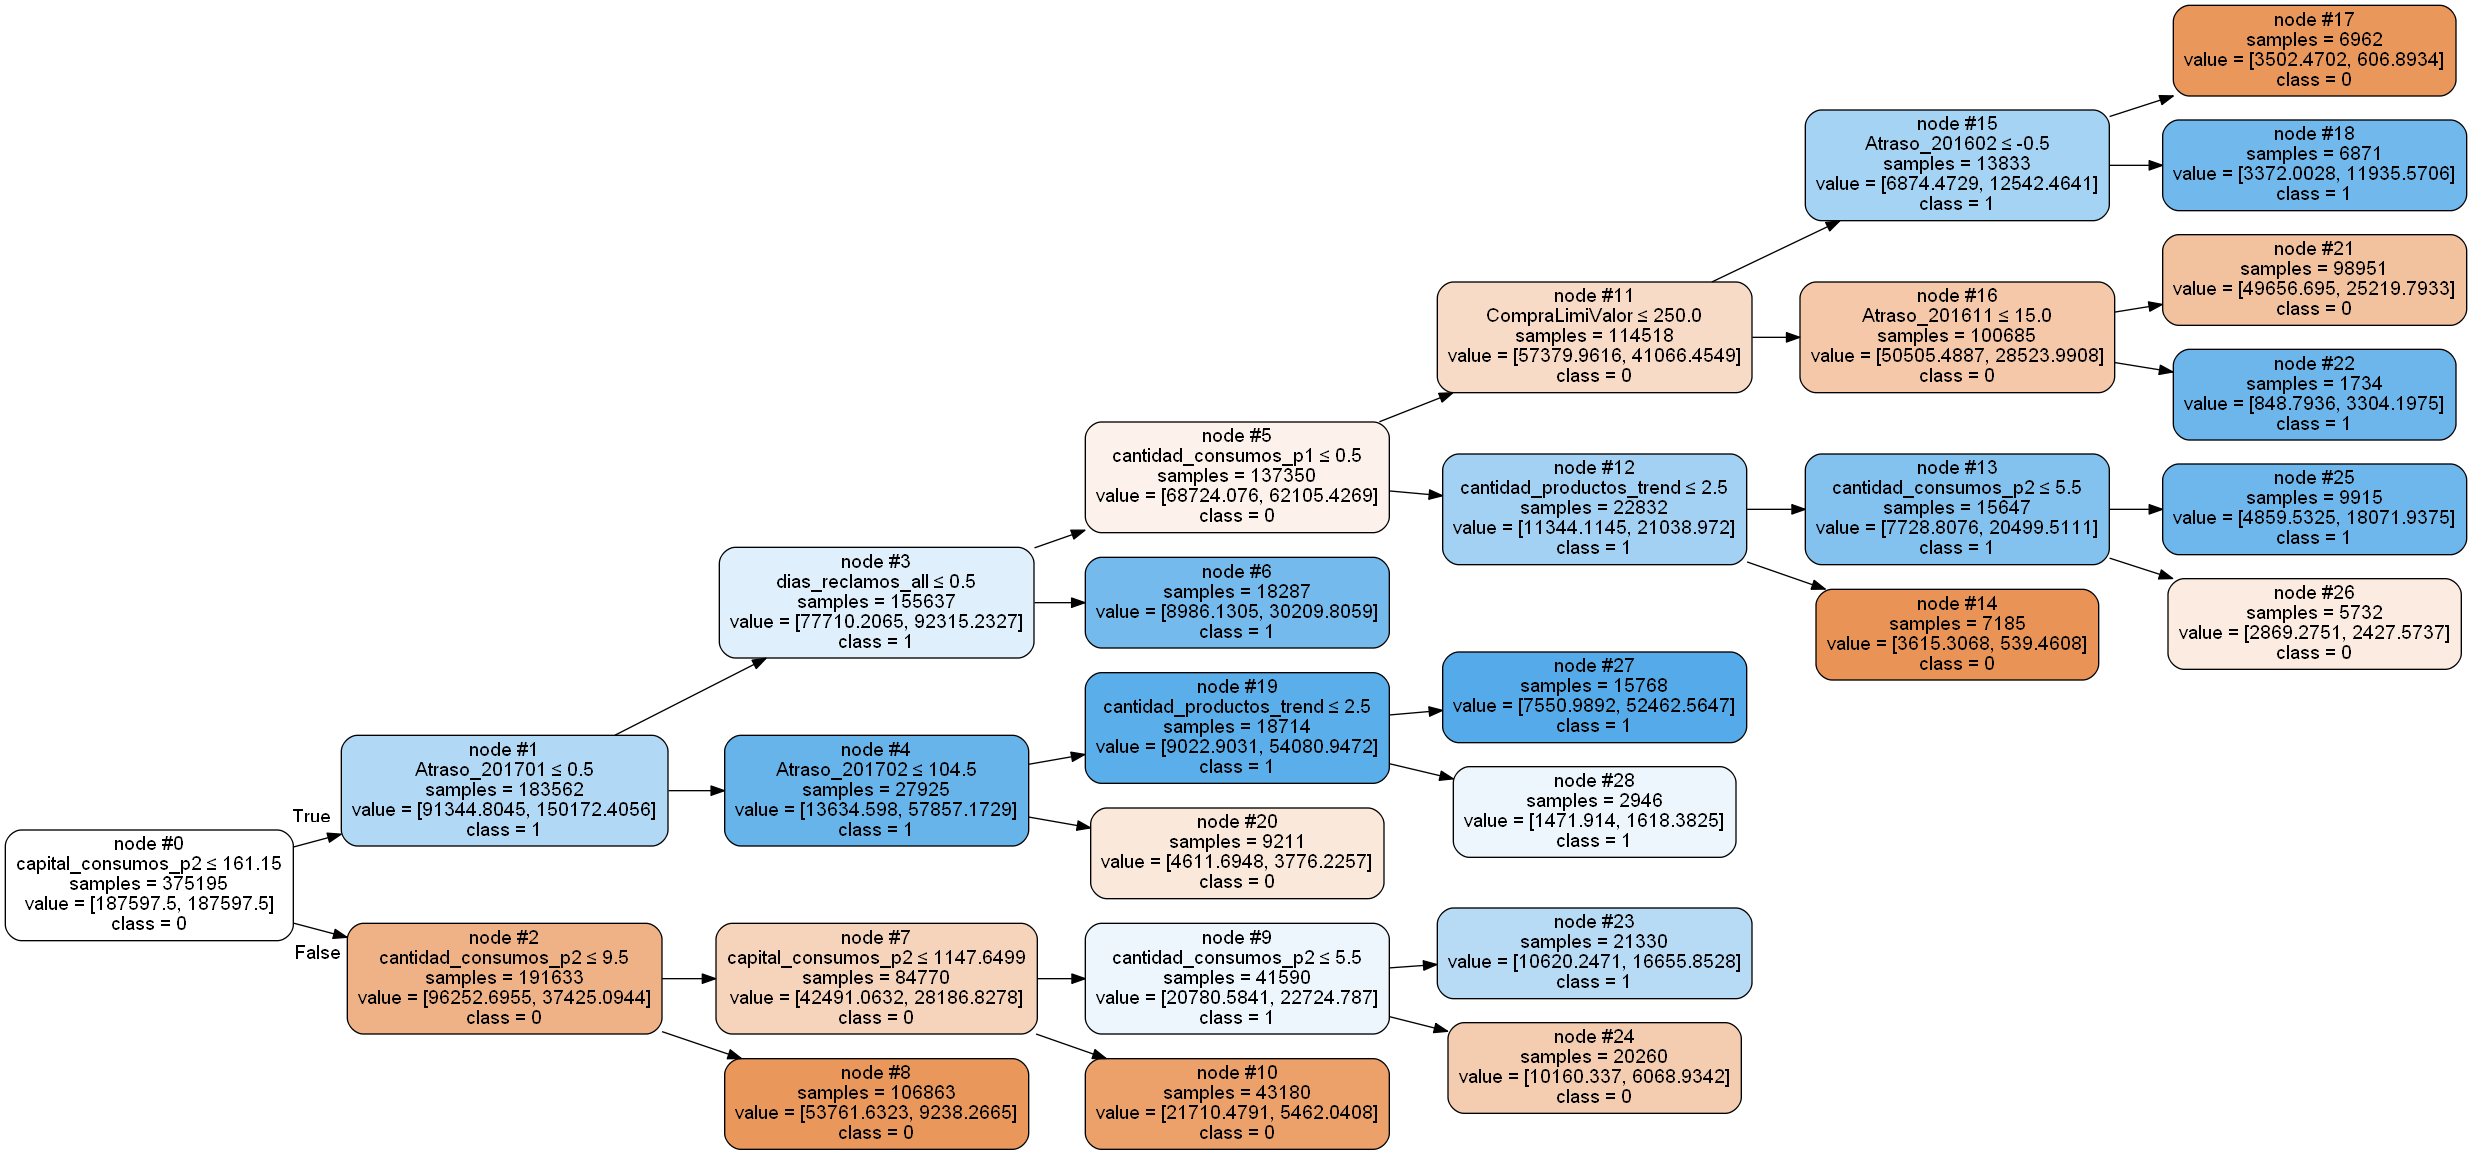

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import StringIO
import pydotplus
from IPython.display import Image
from sklearn import tree
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from IPython.core.display import display, HTML


# Tree
strHTML = "<h2 align='center' style='padding: 2px'>CORDIAL - Modelo de prediccion de bajas</h2>"
strHTML += "<h4 align='center' style='padding: 2px'>Version 2.0 </h4>"
strHTML += "<h4 align='center' style='padding: 2px'><br>Septiembre 2017</h4>"#display(HTML(strHTML))

display(HTML(strHTML))

# Leo file
data = pd.read_csv('c:/r/mydata4.txt', sep=",", header = None)

# Etiqueto variables
data.columns = ["id","clase","antig","provincia","edad","genero","nacionalidad","ocupacion","estadocivil","canthijos","nivelestudio","condprop","cantidad_consumos_all","cantidad_consumos_p1","cantidad_consumos_p2","cantidad_consumos_trend","capital_consumos_all","capital_consumos_p1","capital_consumos_p2","capital_consumos_trend","cantidad_reclamos_all","cantidad_reclamos_p1","cantidad_reclamos_p2","cantidad_reclamos_trend","dias_reclamos_all","dias_reclamos_p1","dias_reclamos_p2","dias_reclamos_tren","cantidad_reclamos_estado1_all","cantidad_reclamos_estado1_p1","cantidad_reclamos_estado1_p2","cantidad_reclamos_estado1_trend","cantidad_reclamos_estado2_all","cantidad_reclamos_estado2_p1","cantidad_reclamos_estado2_p2","cantidad_reclamos_estado2_trend","cantidad_reclamos_estado3_all","cantidad_reclamos_estado3_p1","cantidad_reclamos_estado3_p2","cantidad_reclamos_estado3_trend","cantidad_reclamos_estado4_all","cantidad_reclamos_estado4_p1","cantidad_reclamos_estado4_p2","cantidad_reclamos_estado4_trend","cantidad_reclamos_estado5_all","cantidad_reclamos_estado5_p1","cantidad_reclamos_estado5_p2","cantidad_reclamos_estado5_tren","cantidad_productos_all","cantidad_productos_p1","cantidad_productos_p2","cantidad_productos_trend","cantidad_productos_agrup1_all","cantidad_productos_agrup1_p1","cantidad_productos_agrup1_p2","cantidad_productos_agrup1_trend","cantidad_productos_agrup3_all","cantidad_productos_agrup3_p1","cantidad_productos_agrup3_p2","cantidad_productos_agrup3_trend","cantidad_productos_agrup4_all","cantidad_productos_agrup4_p1","cantidad_productos_agrup4_p2","cantidad_productos_agrup4_trend","otros_all","otros_p1","otros_p2","otros_trend","REv_M1","REv_M2","REv_M3","REv_M4","REv_M5","REv_M6","CompraLimiValor","Ingreso","Relacion_Lim_ing","Atraso_Max_Hist","Atraso_201602","Atraso_201603","Atraso_201604","Atraso_201605","Atraso_201606","Atraso_201607","Atraso_201608","Atraso_201609","Atraso_201610","Atraso_201611","Atraso_201612","Atraso_201701","Atraso_201702","Mes","EstadoPieza"]

# Predictors
X = data[['antig','provincia','edad','genero','nacionalidad','ocupacion','estadocivil','canthijos','nivelestudio','condprop','cantidad_consumos_all','cantidad_consumos_p1','cantidad_consumos_p2','cantidad_consumos_trend','capital_consumos_all','capital_consumos_p1','capital_consumos_p2','capital_consumos_trend','cantidad_reclamos_all','cantidad_reclamos_p1','cantidad_reclamos_p2','cantidad_reclamos_trend','dias_reclamos_all','dias_reclamos_p1','dias_reclamos_p2','dias_reclamos_tren','cantidad_reclamos_estado1_all','cantidad_reclamos_estado1_p1','cantidad_reclamos_estado1_p2','cantidad_reclamos_estado1_trend','cantidad_reclamos_estado2_all','cantidad_reclamos_estado2_p1','cantidad_reclamos_estado2_p2','cantidad_reclamos_estado2_trend','cantidad_reclamos_estado3_all','cantidad_reclamos_estado3_p1','cantidad_reclamos_estado3_p2','cantidad_reclamos_estado3_trend','cantidad_reclamos_estado4_all','cantidad_reclamos_estado4_p1','cantidad_reclamos_estado4_p2','cantidad_reclamos_estado4_trend','cantidad_reclamos_estado5_all','cantidad_reclamos_estado5_p1','cantidad_reclamos_estado5_p2','cantidad_reclamos_estado5_tren','cantidad_productos_all','cantidad_productos_p1','cantidad_productos_p2','cantidad_productos_trend','cantidad_productos_agrup1_all','cantidad_productos_agrup1_p1','cantidad_productos_agrup1_p2','cantidad_productos_agrup1_trend','cantidad_productos_agrup3_all','cantidad_productos_agrup3_p1','cantidad_productos_agrup3_p2','cantidad_productos_agrup3_trend','cantidad_productos_agrup4_all','cantidad_productos_agrup4_p1','cantidad_productos_agrup4_p2','cantidad_productos_agrup4_trend','otros_all','otros_p1','otros_p2','otros_trend','REv_M1','REv_M2','REv_M3','REv_M4','REv_M5','REv_M6','CompraLimiValor','Ingreso','Relacion_Lim_ing','Atraso_Max_Hist','Atraso_201602','Atraso_201603','Atraso_201604','Atraso_201605','Atraso_201606','Atraso_201607','Atraso_201608','Atraso_201609','Atraso_201610','Atraso_201611','Atraso_201612','Atraso_201701','Atraso_201702','Mes','EstadoPieza']]

# Class
y = data[['clase']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10,random_state=0)

# Model
clf2 = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=50,min_samples_split=20, criterion='gini', max_leaf_nodes=15, class_weight='balanced')

 

# Fit
clf2 = clf2.fit(X_train, y_train)

# Predict
clf3 = clf2.predict_proba(X_test)


#strHTML = "<h2 style='padding: 10px'>Tablita de Ganacia</h2>"
strHTML = "<br><h3 align='left' style='padding: 2px'>:1: Ajustes</h2>"

strHTML += "<p>a) Se eliminan los clientes con refinanciacion.</p>"
strHTML += "<p>b) Se re-agrupan los productos en 5 nuevas categorias.</p>"
strHTML += "<p>c) Se agrega un nuevo conjunto de variables: RevM1..RevM6, CompraLimiValor, Ingreso, RelacionLimiteIngreso, AtrasoMaxHist, Atraso201601...Atraso201702, Mes, EstadoPieza.</p>"

strHTML += "<br><h3 align='left' style='padding: 2px'>:2: Modelo</h2>"
strHTML +="<table class='table table-striped'>"
strHTML +="<thead> <tr> <th># Nodo</th> <th>Bajas</th> <th>Poblacion</th> <th>% Bajas</th> <th>% Poblacion</th><th>Ganancia*</th><th>% Acum Bajas</th><th>% Acum Poblacion</th> </tr> </thead>"
strHTML +="<tbody>"
strHTML +="<tr> <th scope='row'>20</th><td>720</td><td>	12388</td><td>	25.88</td><td>	3.30</td><td>	7.84</td><td>	25.88</td><td>	3.30</td></tr>"
strHTML +="<tr> <th scope='row'>12</th><td>426</td><td>	14291</td><td>	15.31</td><td>	3.81</td><td>	4.02</td><td>	41.19</td><td>	7.11</td></tr>"
strHTML +="<tr> <th scope='row'>8</th><td>304</td><td>	15647</td><td>	10.93</td><td>	4.17</td><td>	2.62</td><td>	52.12</td><td>	11.28</td></tr>"
strHTML +="<tr> <th scope='row'>50</th><td>3</td><td>	159</td><td>	0.11</td><td>	0.04</td><td>	2.54</td><td>	52.23</td><td>	11.32</td></tr>"
strHTML +="<tr> <th scope='row'>21</th><td>58</td><td>	3380</td><td>	2.08</td><td>	0.90</td><td>	2.31</td><td>	54.31</td><td>	12.22</td></tr>"
strHTML +="<tr> <th scope='row'>16</th><td>17</td><td>	1075</td><td>	0.61</td><td>	0.29</td><td>	2.13</td><td>	54.92</td><td>	12.51</td></tr>"
strHTML +="<tr> <th scope='row'>34</th><td>170</td><td>	10939</td><td>	6.11</td><td>	2.92</td><td>	2.10</td><td>	61.04</td><td>	15.43</td></tr>"
strHTML +="<tr> <th scope='row'>5</th><td>186</td><td>	13833</td><td>	6.69</td><td>	3.69</td><td>	1.81</td><td>	67.72</td><td>	19.11</td></tr>"
strHTML +="<tr> <th scope='row'>27</th><td>44</td><td>	3278</td><td>	1.58</td><td>	0.87</td><td>	1.81</td><td>	69.30</td><td>	19.99</td></tr>"
strHTML +="<tr> <th scope='row'>38</th><td>28</td><td>	2351</td><td>	1.01</td><td>	0.63</td><td>	1.61</td><td>	70.31</td><td>	20.61</td></tr>"
strHTML +="<tr> <th scope='row'>24</th><td>24</td><td>	2042</td><td>	0.86</td><td>	0.54</td><td>	1.59</td><td>	71.17</td><td>	21.16</td></tr>"
strHTML +="<tr> <th scope='row'>56</th><td>27</td><td>	2515</td><td>	0.97</td><td>	0.67</td><td>	1.45</td><td>	72.14</td><td>	21.83</td></tr>"
strHTML +="<tr> <th scope='row'>44</th><td>23</td><td>	2483</td><td>	0.83</td><td>	0.66</td><td>	1.25</td><td>	72.97</td><td>	22.49</td></tr>"
strHTML +="<tr> <th scope='row'>59</th><td>8</td><td>	969</td><td>	0.29</td><td>	0.26</td><td>	1.11</td><td>	73.26</td><td>	22.75</td></tr>"
strHTML +="<tr> <th scope='row'>35</th><td>77</td><td>	10391</td><td>	2.77</td><td>	2.77</td><td>	1.00</td><td>	76.02</td><td>	25.52</td></tr>"
strHTML +="<tr> <th scope='row'>13</th><td>5</td><td>	1119</td><td>	0.18</td><td>	0.30</td><td>	0.60</td><td>	76.20</td><td>	25.82</td></tr>"
strHTML +="<tr> <th scope='row'>52</th><td>13</td><td>	3061</td><td>	0.47</td><td>	0.82</td><td>	0.57</td><td>	76.67</td><td>	26.63</td></tr>"
strHTML +="<tr> <th scope='row'>6</th><td>423</td><td>	100685</td><td>	15.20</td><td>	26.84</td><td>	0.57</td><td>	91.88</td><td>	53.47</td></tr>"
strHTML +="<tr> <th scope='row'>37</th><td>62</td><td>	17909</td><td>	2.23</td><td>	4.77</td><td>	0.47</td><td>	94.10</td><td>	58.24</td></tr>"
strHTML +="<tr> <th scope='row'>28</th><td>12</td><td>	3537</td><td>	0.43</td><td>	0.94</td><td>	0.46</td><td>	94.54</td><td>	59.18</td></tr>"
strHTML +="<tr> <th scope='row'>57</th><td>16</td><td>	5646</td><td>	0.58</td><td>	1.50</td><td>	0.38</td><td>	95.11</td><td>	60.69</td></tr>"
strHTML +="<tr> <th scope='row'>41</th><td>40</td><td>	16707</td><td>	1.44</td><td>	4.45</td><td>	0.32</td><td>	96.55</td><td>	65.14</td></tr>"
strHTML +="<tr> <th scope='row'>9</th><td>8</td><td>	7185</td><td>	0.29</td><td>	1.92</td><td>	0.15</td><td>	96.84</td><td>	67.06</td></tr>"
strHTML +="<tr> <th scope='row'>60</th><td>16</td><td>	15140</td><td>	0.58</td><td>	4.04</td><td>	0.14</td><td>	97.41</td><td>	71.09</td></tr>"
strHTML +="<tr> <th scope='row'>45</th><td>2</td><td>	1912</td><td>	0.07</td><td>	0.51</td><td>	0.14</td><td>	97.48</td><td>	71.60</td></tr>"
strHTML +="<tr> <th scope='row'>42</th><td>16</td><td>	22078</td><td>	0.58</td><td>	5.88</td><td>	0.10</td><td>	98.06</td><td>	77.49</td></tr>"
strHTML +="<tr> <th scope='row'>49</th><td>54</td><td>	78103</td><td>	1.94</td><td>	20.82</td><td>	0.09</td><td>	100.00</td><td>	98.30</td></tr>"
strHTML +="<tr> <th scope='row'>15</th><td>0</td><td>	1802</td><td>	0.00</td><td>	0.48</td><td>	0.00</td><td>	100.00</td><td>	98.78</td></tr>"
strHTML +="<tr> <th scope='row'>23</th><td>0</td><td>	904</td><td>	0.00</td><td>	0.24</td><td>	0.00</td><td>	100.00</td><td>	99.02</td></tr>"
strHTML +="<tr> <th scope='row'>53</th><td>0</td><td>	1270</td><td>	0.00</td><td>	0.34</td><td>	0.00</td><td>	100.00</td><td>	99.36</td></tr>"
strHTML +="<tr> <th scope='row'>29</th><td>0</td><td>	2396</td><td>	0.00</td><td>	0.64</td><td>	0.00</td><td>	100.00</td><td>	100.00</td></tr>"
strHTML +="</tbody> </table>"
display(HTML(strHTML))

from IPython.display import display, Math, Latex
display(Latex(r"""\begin{eqnarray}
Ganancia^* = \frac{(\frac{Bajas}{Poblacion})}{(\frac{Total Bajas}{Total Poblacion})}\,
\end{eqnarray}"""))

# Calculate fpr, tpr
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values, clf3[:,1])

### GAIN
gain_x = [0, 3.30, 7.11, 11.28, 11.32, 12.22, 12.51, 15.43, 19.11, 19.99, 20.61, 21.16, 21.83, 22.49, 22.75, 25.52, 25.82, 26.63, 53.47, 58.24, 59.18, 60.69, 65.14, 67.06, 71.09, 71.60, 77.49, 98.30, 98.78, 99.02, 99.36, 100.00]
gain_y = [0, 25.88, 41.19, 52.12, 52.23, 54.31, 54.92, 61.04, 67.72, 69.30, 70.31, 71.17, 72.14, 72.97, 73.26, 76.02, 76.20, 76.67, 91.88, 94.10, 94.54, 95.11, 96.55, 96.84, 97.41, 97.48, 98.06, 100.00, 100.00, 100.00, 100.00, 100.00]

roc_auc = auc(gain_x, gain_y) / 10000
roc_auc2 = auc(false_positive_rate, true_positive_rate)

#strHTML = "<p>El modelo (arbol) agrupa en distintos nodos los clientes discriminando lo más posible los que se dan de baja de los que no. La tabla muestra los nodos ordenados segun el indice de ganancia (cuanto más lejos de 1 mejor).</p>"
#strHTML += "<p><font color=blue>Reglas principales</font></p>"
#strHTML += "<p><font size=1><b>Nodo #12</b><br> ::Cantidades<br>4,67% de todos los casos<br>26,59% de todas las bajas<br>Ganancia: 5,69<br>::Regla <br>Cantidad_Productos_Agrup5_Trend <= 0,5 AND Capital_Consumos_P2 <= 186,55 AND Dias_Reclamos_Trend > 0,5 AND Cantidad_Consumos_P2 <= 11,5 AND Cantidad_Productos_Trend <= 2,5 <br><br>Si no tiene productos de refinanciación en los úlitmos doce meses Y Realizó consumos por menos de AR$ 186,55 en menos de 12 veces en los últimos seis meses Y Realizó al menos un reclamo en los últimos doce meses Y Mantuvo o disminuyó la cantidad de productos en los últimos 12 meses </font></p>"
#display(HTML(strHTML))


dot_data = StringIO.StringIO()  
tree.export_graphviz(clf2, out_file=dot_data,  
                     feature_names=['antig','provincia','edad','genero','nacionalidad','ocupacion','estadocivil','canthijos','nivelestudio','condprop','cantidad_consumos_all','cantidad_consumos_p1','cantidad_consumos_p2','cantidad_consumos_trend','capital_consumos_all','capital_consumos_p1','capital_consumos_p2','capital_consumos_trend','cantidad_reclamos_all','cantidad_reclamos_p1','cantidad_reclamos_p2','cantidad_reclamos_trend','dias_reclamos_all','dias_reclamos_p1','dias_reclamos_p2','dias_reclamos_tren','cantidad_reclamos_estado1_all','cantidad_reclamos_estado1_p1','cantidad_reclamos_estado1_p2','cantidad_reclamos_estado1_trend','cantidad_reclamos_estado2_all','cantidad_reclamos_estado2_p1','cantidad_reclamos_estado2_p2','cantidad_reclamos_estado2_trend','cantidad_reclamos_estado3_all','cantidad_reclamos_estado3_p1','cantidad_reclamos_estado3_p2','cantidad_reclamos_estado3_trend','cantidad_reclamos_estado4_all','cantidad_reclamos_estado4_p1','cantidad_reclamos_estado4_p2','cantidad_reclamos_estado4_trend','cantidad_reclamos_estado5_all','cantidad_reclamos_estado5_p1','cantidad_reclamos_estado5_p2','cantidad_reclamos_estado5_tren','cantidad_productos_all','cantidad_productos_p1','cantidad_productos_p2','cantidad_productos_trend','cantidad_productos_agrup1_all','cantidad_productos_agrup1_p1','cantidad_productos_agrup1_p2','cantidad_productos_agrup1_trend','cantidad_productos_agrup3_all','cantidad_productos_agrup3_p1','cantidad_productos_agrup3_p2','cantidad_productos_agrup3_trend','cantidad_productos_agrup4_all','cantidad_productos_agrup4_p1','cantidad_productos_agrup4_p2','cantidad_productos_agrup4_trend','otros_all','otros_p1','otros_p2','otros_trend','REv_M1','REv_M2','REv_M3','REv_M4','REv_M5','REv_M6','CompraLimiValor','Ingreso','Relacion_Lim_ing','Atraso_Max_Hist','Atraso_201602','Atraso_201603','Atraso_201604','Atraso_201605','Atraso_201606','Atraso_201607','Atraso_201608','Atraso_201609','Atraso_201610','Atraso_201611','Atraso_201612','Atraso_201701','Atraso_201702','Mes','EstadoPieza'],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,
                     special_characters=True,
                    proportion=True,
                    rotate=True,
                    impurity=False,
                    node_ids=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



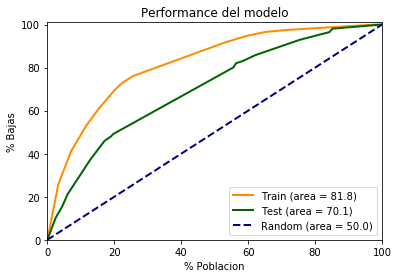

In [92]:
##### ROC
strHTML = "<h3 align='left' style='padding: 2px'>:3: Performance</h2>"
strHTML += "<p>Se utilizo el 90 por ciento de los datos para entrenar el modeo y el 10 por ciento para validarlo.</p>"
strHTML += "<p>En el grafico se puede ver que la performance del nuevo modelo es muy buena, e incluso supera a la version anterior.<br><br></p>"
display(HTML(strHTML))

plt.figure()
lw = 2
#plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(gain_x, gain_y, color='darkorange',
         lw=lw, label='Train (area = %0.1f)' % (roc_auc * 100))
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])

plt.plot(false_positive_rate*100, true_positive_rate*100, color='darkgreen',
         lw=lw, label='Test (area = %0.1f)' % (roc_auc2 * 100))

plt.plot([0, 100], [0, 100], color='navy', lw=lw, linestyle='--', label = 'Random (area = %0.1f)' % 50)
plt.xlim([0.0, 100.0])
plt.ylim([0.0, 101.0])

plt.xlabel('% Poblacion')
plt.ylabel('% Bajas')
plt.title('Performance del modelo')
plt.legend(loc="lower right")
plt.show()

